696
X: 1155
Y: 977
R: 696
<class 'numpy.ndarray'> (1532, 1532, 3) uint8


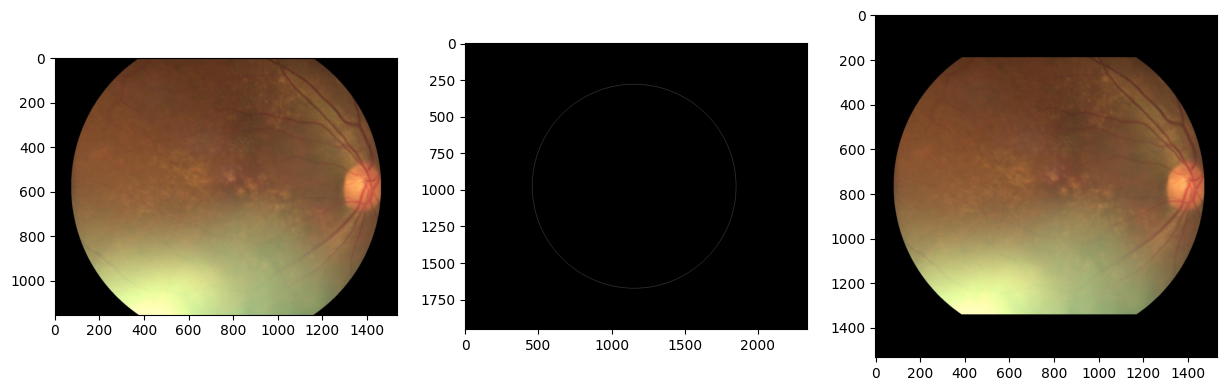

In [2]:

import numpy as np
import matplotlib.pyplot as plt

from skimage import color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.io import imread

# Load picture
image_rgb = imread(r'/content/drive/MyDrive/ODIR/Images/bad_crop/888_right.jpg')

# Introduce pre-padding
pad=400
padX = np.zeros((image_rgb.shape[0],pad,3), dtype=np.uint8)
orig_image_padded = np.hstack((padX,image_rgb,padX))
padY = np.zeros((pad,orig_image_padded.shape[1],3), dtype=np.uint8)
orig_image_padded = np.vstack((padY,orig_image_padded,padY))

# Convert to uint8 grayscale
image = img_as_ubyte(color.rgb2gray(orig_image_padded))

# Detect edges with Canny filter
edges = canny(image, sigma=1)

# Estimate radius
I = np.nonzero(edges)
DY = np.max(I[0]) - np.min(I[0])
DX = np.max(I[1]) - np.min(I[1])
maxR = int(round(max(DX,DY)/2))
print(maxR)

# Detect radii with Hough transform
a = 200
resolution = 20
low_lim = maxR - a
upp_lim = maxR + a
hough_radii = np.arange(low_lim, upp_lim, resolution)
hough_res = hough_circle(edges, hough_radii)

# Select the average of the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,total_num_peaks=3)
C_X, C_Y, R = int(round(np.mean(cx))), int(round(np.mean(cy))), int(round(np.mean(radii)))

print("X:",C_X)
print("Y:",C_Y)
print("R:",R)

# Make circular border to visualize distinction
border = np.zeros(image.shape, dtype=np.uint8)
circy, circx = circle_perimeter(C_Y, C_X, R, shape=image.shape)
border[circy, circx] = 255

padding = 10
# Introduce post-padding
offset = R + int(round(R*padding/100))

# Crop image
x_from = C_X - offset
x_to   = C_X + offset
y_from = C_Y - offset
y_to   = C_Y + offset
img_cropped = orig_image_padded[y_from:y_to, x_from:x_to]

# Draw results
print(type(img_cropped), img_cropped.shape, img_cropped.dtype)
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15, 6))
ax[0].imshow(image_rgb)
ax[1].imshow(border, cmap=plt.cm.gray)
ax[2].imshow(img_cropped)
plt.show()


In [3]:

import numpy as np
from skimage.color import rgb2gray
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

def crop(orig_image,
         a = 200,
         resolution = 20,
         num_of_circles = 3,
         padding = 10):
  # Image must be RGB numpy 3D ndarray
  # ALL dtypes

  # Introduce pre-padding
  pad=400
  padX = np.zeros((orig_image.shape[0],pad,3), dtype=np.uint8)
  orig_image_padded = np.hstack((padX,orig_image,padX))
  padY = np.zeros((pad,orig_image_padded.shape[1],3), dtype=np.uint8)
  orig_image_padded = np.vstack((padY,orig_image_padded,padY))

  # Convert to uint8 grayscale
  image = img_as_ubyte(rgb2gray(orig_image_padded))

  # Detect edges with Canny filter
  edges = canny(image, sigma=1)

  # Estimate radius
  I = np.nonzero(edges)
  DY = np.max(I[0]) - np.min(I[0])
  DX = np.max(I[1]) - np.min(I[1])
  maxR = int(round(max(DX,DY)/2))

  # Detect radii with Hough transform
  low_lim = maxR - a
  upp_lim = maxR + a
  hough_radii = np.arange(low_lim, upp_lim, resolution)
  hough_res = hough_circle(edges, hough_radii)

  # Select the average of the most prominent circles
  accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=num_of_circles)
  C_X, C_Y, R = int(round(np.mean(cx))), int(round(np.mean(cy))), int(round(np.mean(radii)))

  # Introduce post-padding
  offset = R + int(round(R*padding/100))
  # Crop
  x_from = C_X - offset
  x_to   = C_X + offset
  y_from = C_Y - offset
  y_to   = C_Y + offset

  # Image returned with axis and colors untouched
  return orig_image_padded[y_from:y_to, x_from:x_to]


Rendering :  882_left.jpg
Input :  <class 'numpy.ndarray'> (1296, 1920, 3) uint8
Output :  <class 'numpy.ndarray'> (1586, 1586, 3) uint8 

Rendering :  42_right.jpg
Input :  <class 'numpy.ndarray'> (1444, 1444, 3) uint8
Output :  <class 'numpy.ndarray'> (1576, 1576, 3) uint8 

Rendering :  63_right.jpg
Input :  <class 'numpy.ndarray'> (1444, 1444, 3) uint8
Output :  <class 'numpy.ndarray'> (1568, 1568, 3) uint8 

Rendering :  285_left.jpg
Input :  <class 'numpy.ndarray'> (1152, 1536, 3) uint8
Output :  <class 'numpy.ndarray'> (1532, 1532, 3) uint8 

Rendering :  144_left.jpg
Input :  <class 'numpy.ndarray'> (1444, 1444, 3) uint8
Output :  <class 'numpy.ndarray'> (1566, 1566, 3) uint8 



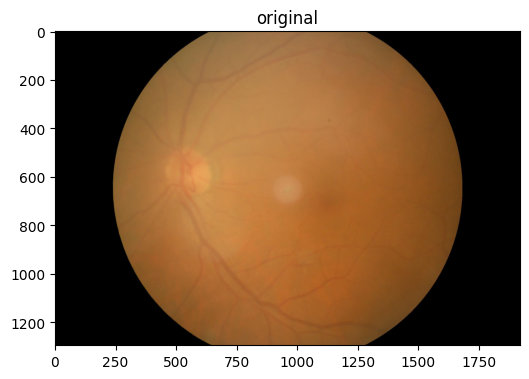

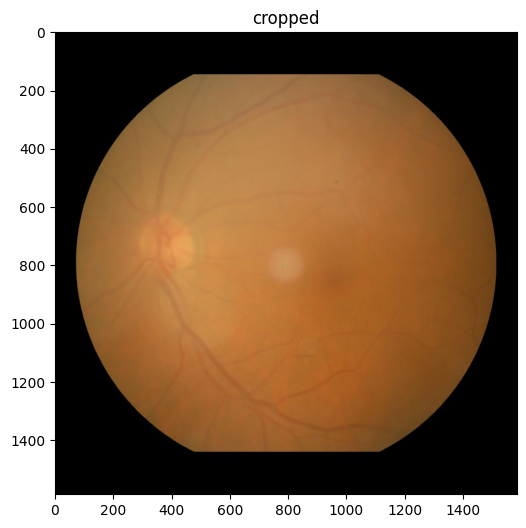

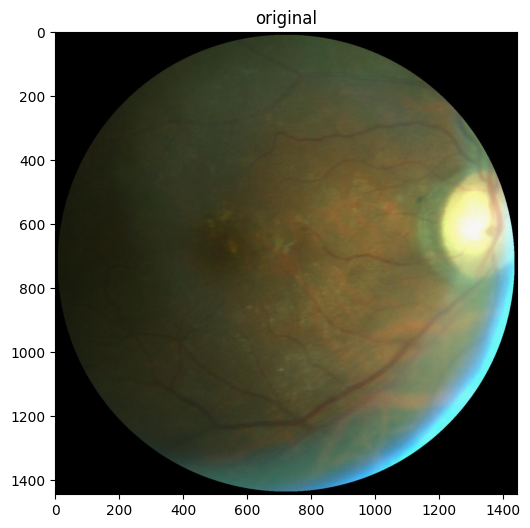

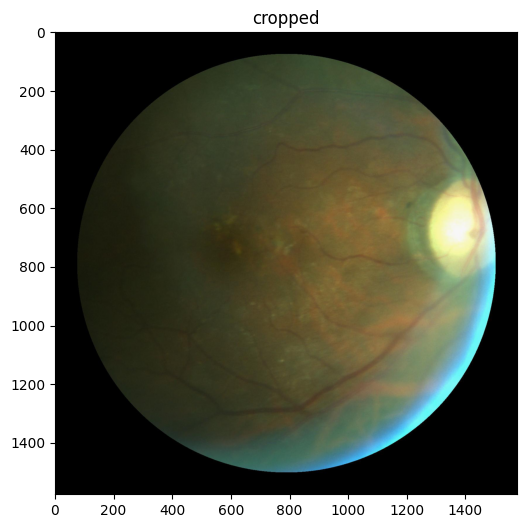

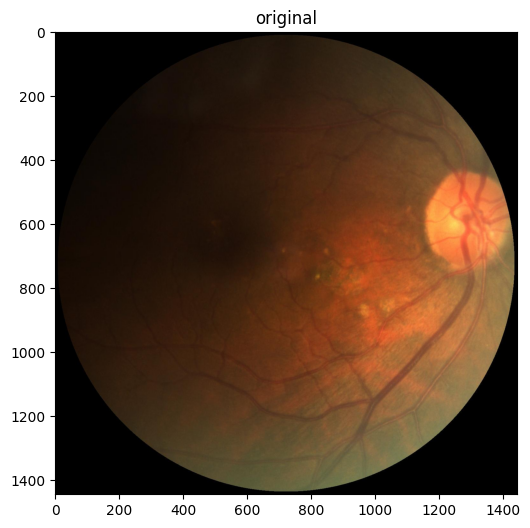

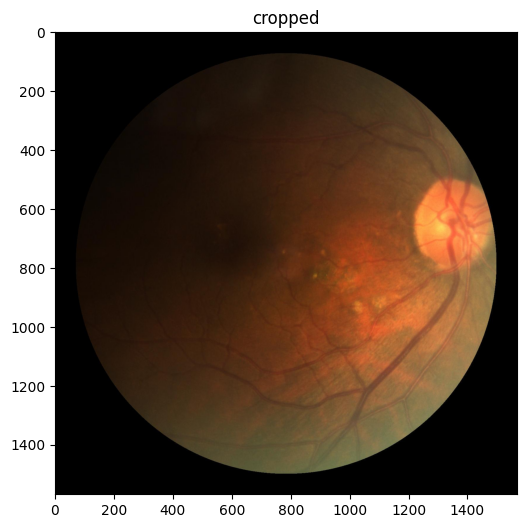

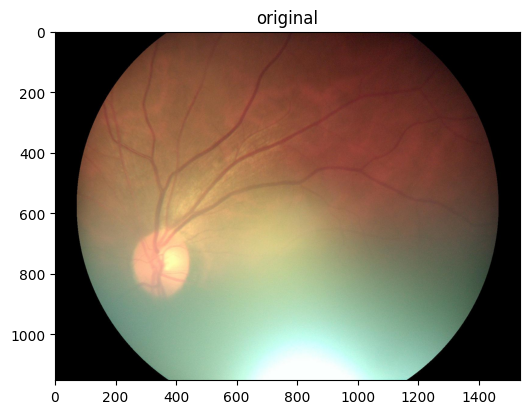

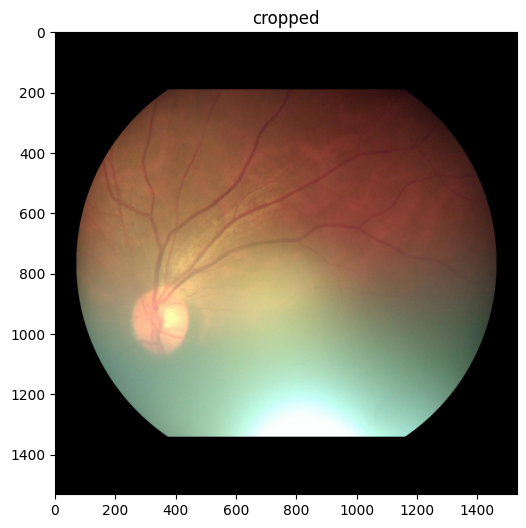

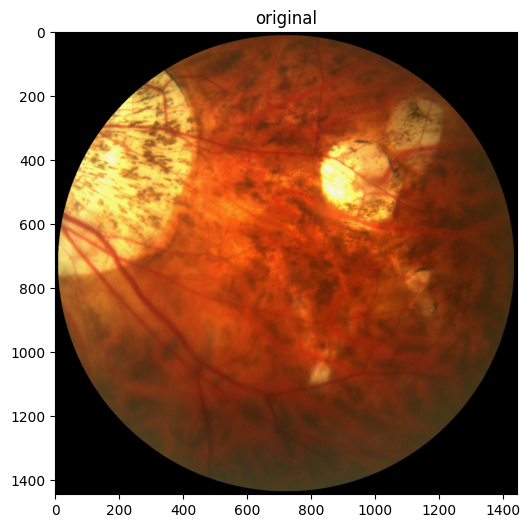

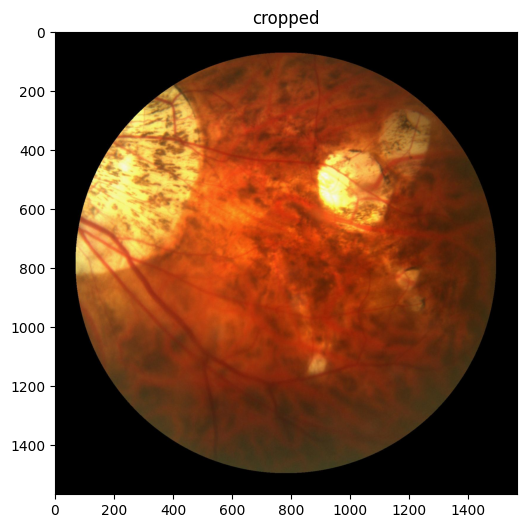

In [4]:

import matplotlib.pyplot as plt
from skimage.io import imread
import os

def plot_image(img, title='', map=None):
  fig, ax = plt.subplots(ncols=1, figsize=(6, 6))
  ax.imshow(img, cmap=map)
  ax.set_title(title)
  ax.axis('on')
  fig.show()

root = r'/content/drive/MyDrive/ODIR/Images/bad_crop/'
files = os.listdir(root)

# load image here
for f in files[0:5] :
  orig_img = imread(root+f)

  print("Rendering : " , f)
  print("Input : ", type(orig_img), orig_img.shape, orig_img.dtype)
  plot_image(orig_img, 'original')

  cropped = crop(orig_img, a=10, resolution=4, num_of_circles=3, padding=10)

  print("Output : ",type(cropped), cropped.shape, cropped.dtype,"\n")
  plot_image(cropped, 'cropped')
